In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
df=pd.read_csv('C:/Users/Ankan/Downloads/final_gc_anolomy.csv')

In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)
df  = df[df['building_number']==4]
df.tail()

,timestamp,main_meter,sub_meter_1,sub_meter_2,building_number,weekend,corporate,main_meter_4,main_meter_12,day of week_0,day of week_1,day of week_2,day of week_3,day of week_4,day of week_5,day of week_6
26395,2017-12-31 19:00:00,3659.553492,6.857998,1184.460127,4,1,1,8642.364573,7221.259176,0,0,0,0,0,0,1
26396,2017-12-31 20:00:00,3515.897324,7.327728,1224.011931,4,1,0,3425.900099,7221.259176,0,0,0,0,0,0,1
26397,2017-12-31 21:00:00,3217.272386,8.154114,825.583543,4,1,0,3425.900099,7221.259176,0,0,0,0,0,0,1
26398,2017-12-31 22:00:00,3237.189207,7.949655,961.699426,4,1,0,3425.900099,7221.259176,0,0,0,0,0,0,1
26399,2017-12-31 23:00:00,3733.241478,11.252074,1047.407876,4,1,0,3425.900099,7221.259176,0,0,0,0,0,0,1


In [13]:
df=df.drop(columns=['sub_meter_2','main_meter','building_number','weekend','corporate','main_meter_4','main_meter_12','day of week_0','day of week_1','day of week_2','day of week_3','day of week_4','day of week_5','day of week_6'])
df=df.set_index('timestamp')
df.head()

,sub_meter_1
timestamp,
2017-01-04 00:00:00,6.138407
2017-01-04 01:00:00,11.876920
2017-01-04 02:00:00,4.487273
2017-01-04 03:00:00,6.518857
2017-01-04 04:00:00,8.103356


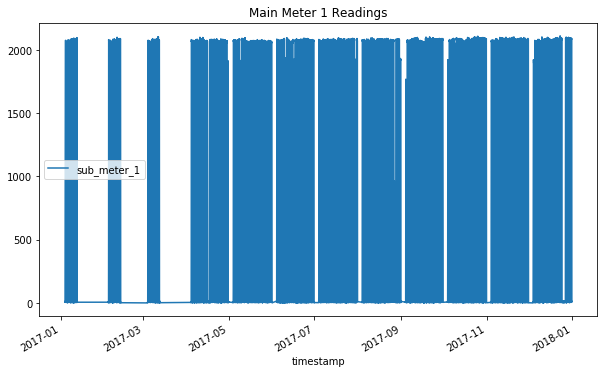

In [14]:
from plotly.offline import plot
import cufflinks as cf
df.plot(title="Main Meter 1 Readings", figsize=(10,6))

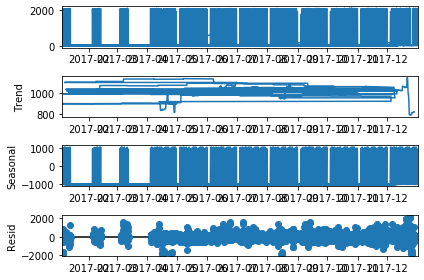

In [15]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='additive',period=168)
fig=result.plot()

In [19]:
from pmdarima import auto_arima
stepwise_model = auto_arima(df, start_p=1, start_q=1,
                           max_p=5, max_q=5,
                           start_P=0, seasonal=False,
                           d=0, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 0, 1); AIC=96896.694, BIC=96923.873, Fit time=0.960 seconds
Fit ARIMA: order=(0, 0, 0); AIC=109529.430, BIC=109543.019, Fit time=0.002 seconds
Fit ARIMA: order=(1, 0, 0); AIC=98160.058, BIC=98180.442, Fit time=0.117 seconds
Fit ARIMA: order=(0, 0, 1); AIC=102768.602, BIC=102788.986, Fit time=0.388 seconds
Fit ARIMA: order=(2, 0, 1); AIC=96524.508, BIC=96558.483, Fit time=1.289 seconds
Fit ARIMA: order=(2, 0, 0); AIC=96725.057, BIC=96752.236, Fit time=0.218 seconds
Fit ARIMA: order=(2, 0, 2); AIC=96166.775, BIC=96207.544, Fit time=2.318 seconds
Fit ARIMA: order=(3, 0, 3); AIC=95091.642, BIC=95146.001, Fit time=35.428 seconds
Fit ARIMA: order=(2, 0, 3); AIC=96099.128, BIC=96146.692, Fit time=2.300 seconds
Fit ARIMA: order=(4, 0, 3); AIC=95086.009, BIC=95147.163, Fit time=16.181 seconds
Fit ARIMA: order=(4, 0, 2); AIC=96115.050, BIC=96169.409, Fit time=2.246 seconds
Fit ARIMA: order=(4, 0, 4); AIC=95621.083, BIC=95689.031, Fit time=10.527 seconds
Fit ARIMA: order=(3, 

In [20]:
train = df.loc['01-04-2017 00:00:00':'07-11-2017 00:00:00']
test = df.loc['07-11-2017 00:00:00':]
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(4, 0, 3),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend=None, with_intercept=True)

In [21]:
future_forecast = stepwise_model.predict(n_periods=1320)
future_forecast

array([ 41.11237701,  69.70314257, 146.42545162, ..., 651.64873119,
       507.55178743, 396.7634126 ])

In [22]:
a=pd.DataFrame(data=future_forecast)
a.to_csv('updatedb4m2.csv')

# add the code to show actual vs predicted
